przemiana obrazu do skali szarości

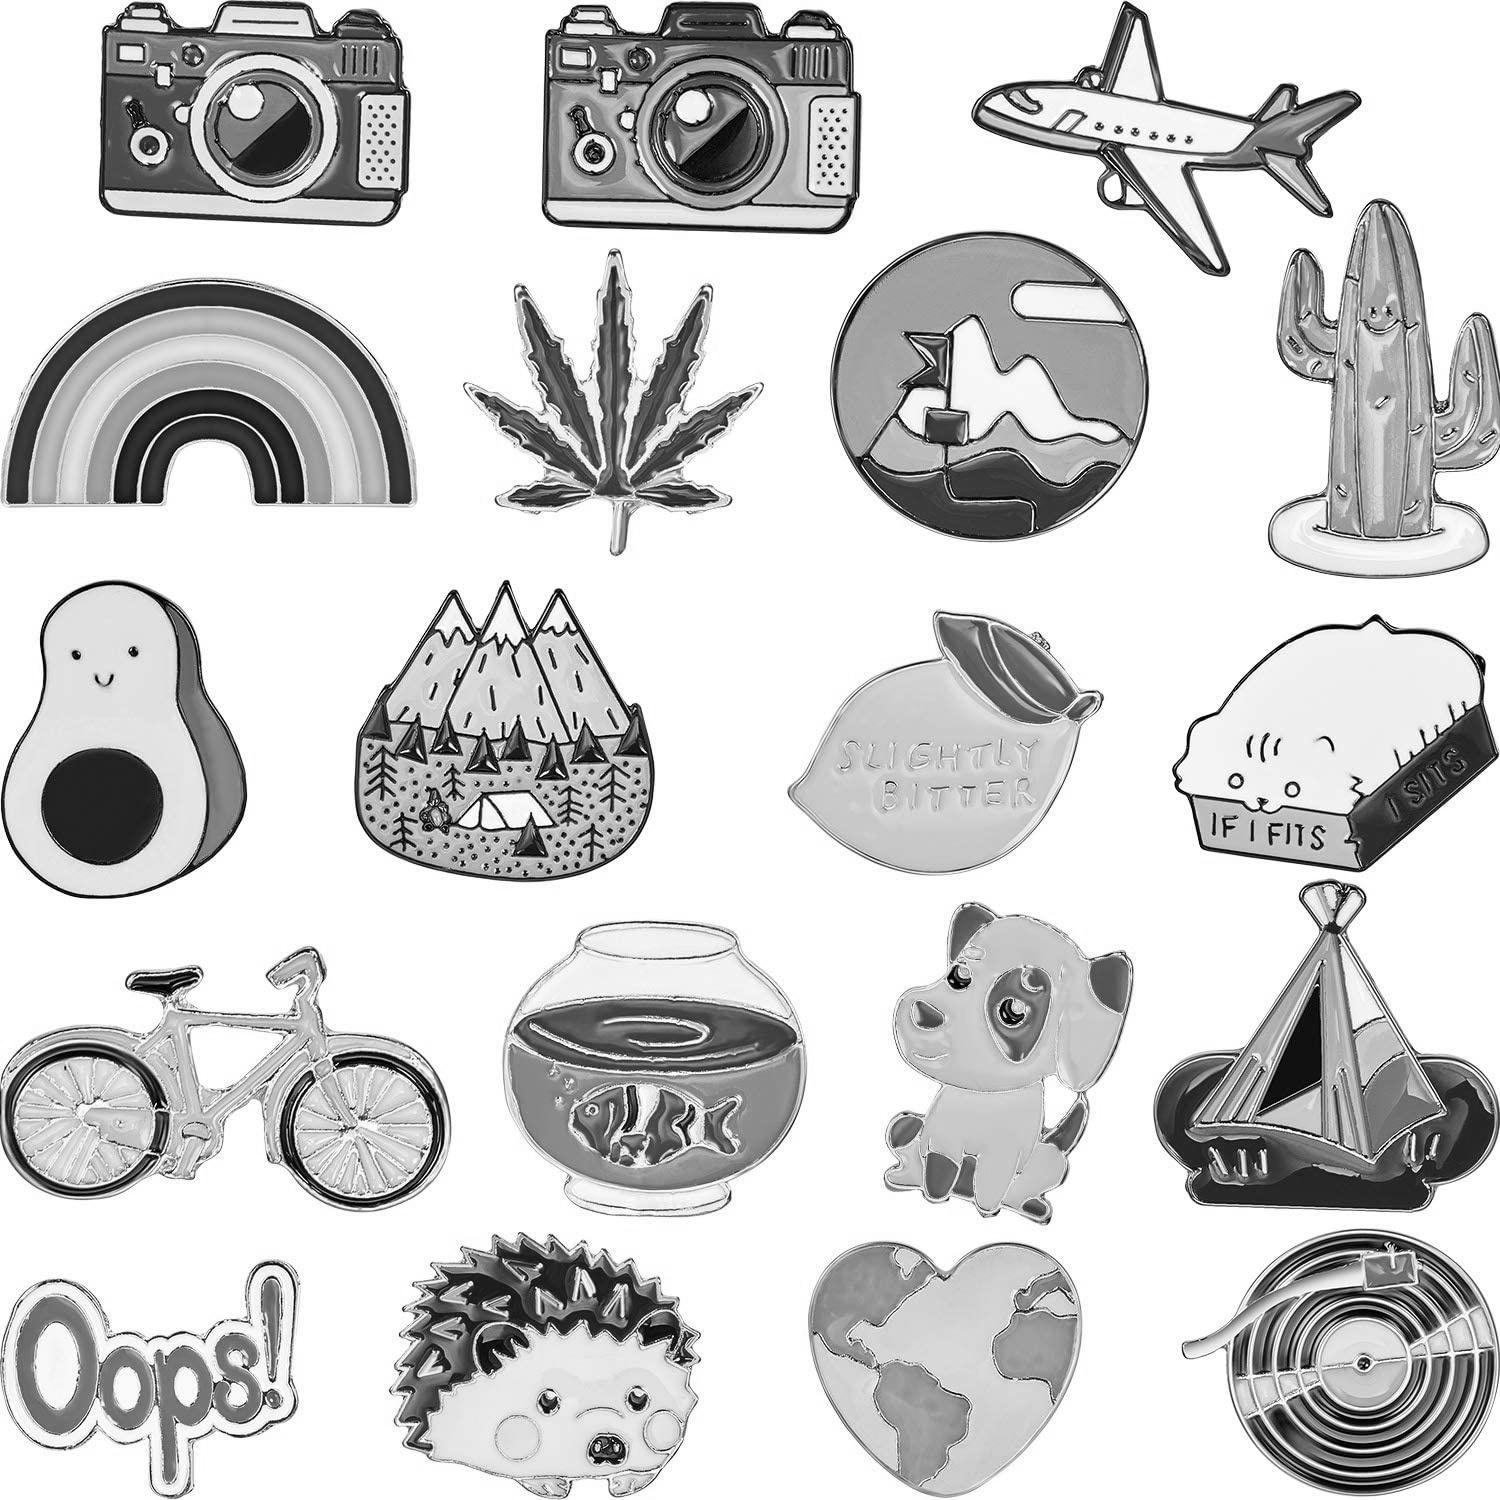

In [1]:
import imutils
import cv2
from IPython.display import Image

image3 = cv2.imread("jpg/pins.jpg")
cv2.imshow("Image", image3)
cv2.waitKey(0)
Image("jpg/pins.jpg")
gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
cv2.imwrite("jpg/pinsgray.jpg", gray)
Image("jpg/pinsgray.jpg")

Wyszukiwanie krawędzi

In [3]:
edged = cv2.Canny(gray, 30, 150)
cv2.imwrite("jpg/pinsedges.jpg", edged)
Image("jpg/pinsedges.jpg")

treshholding

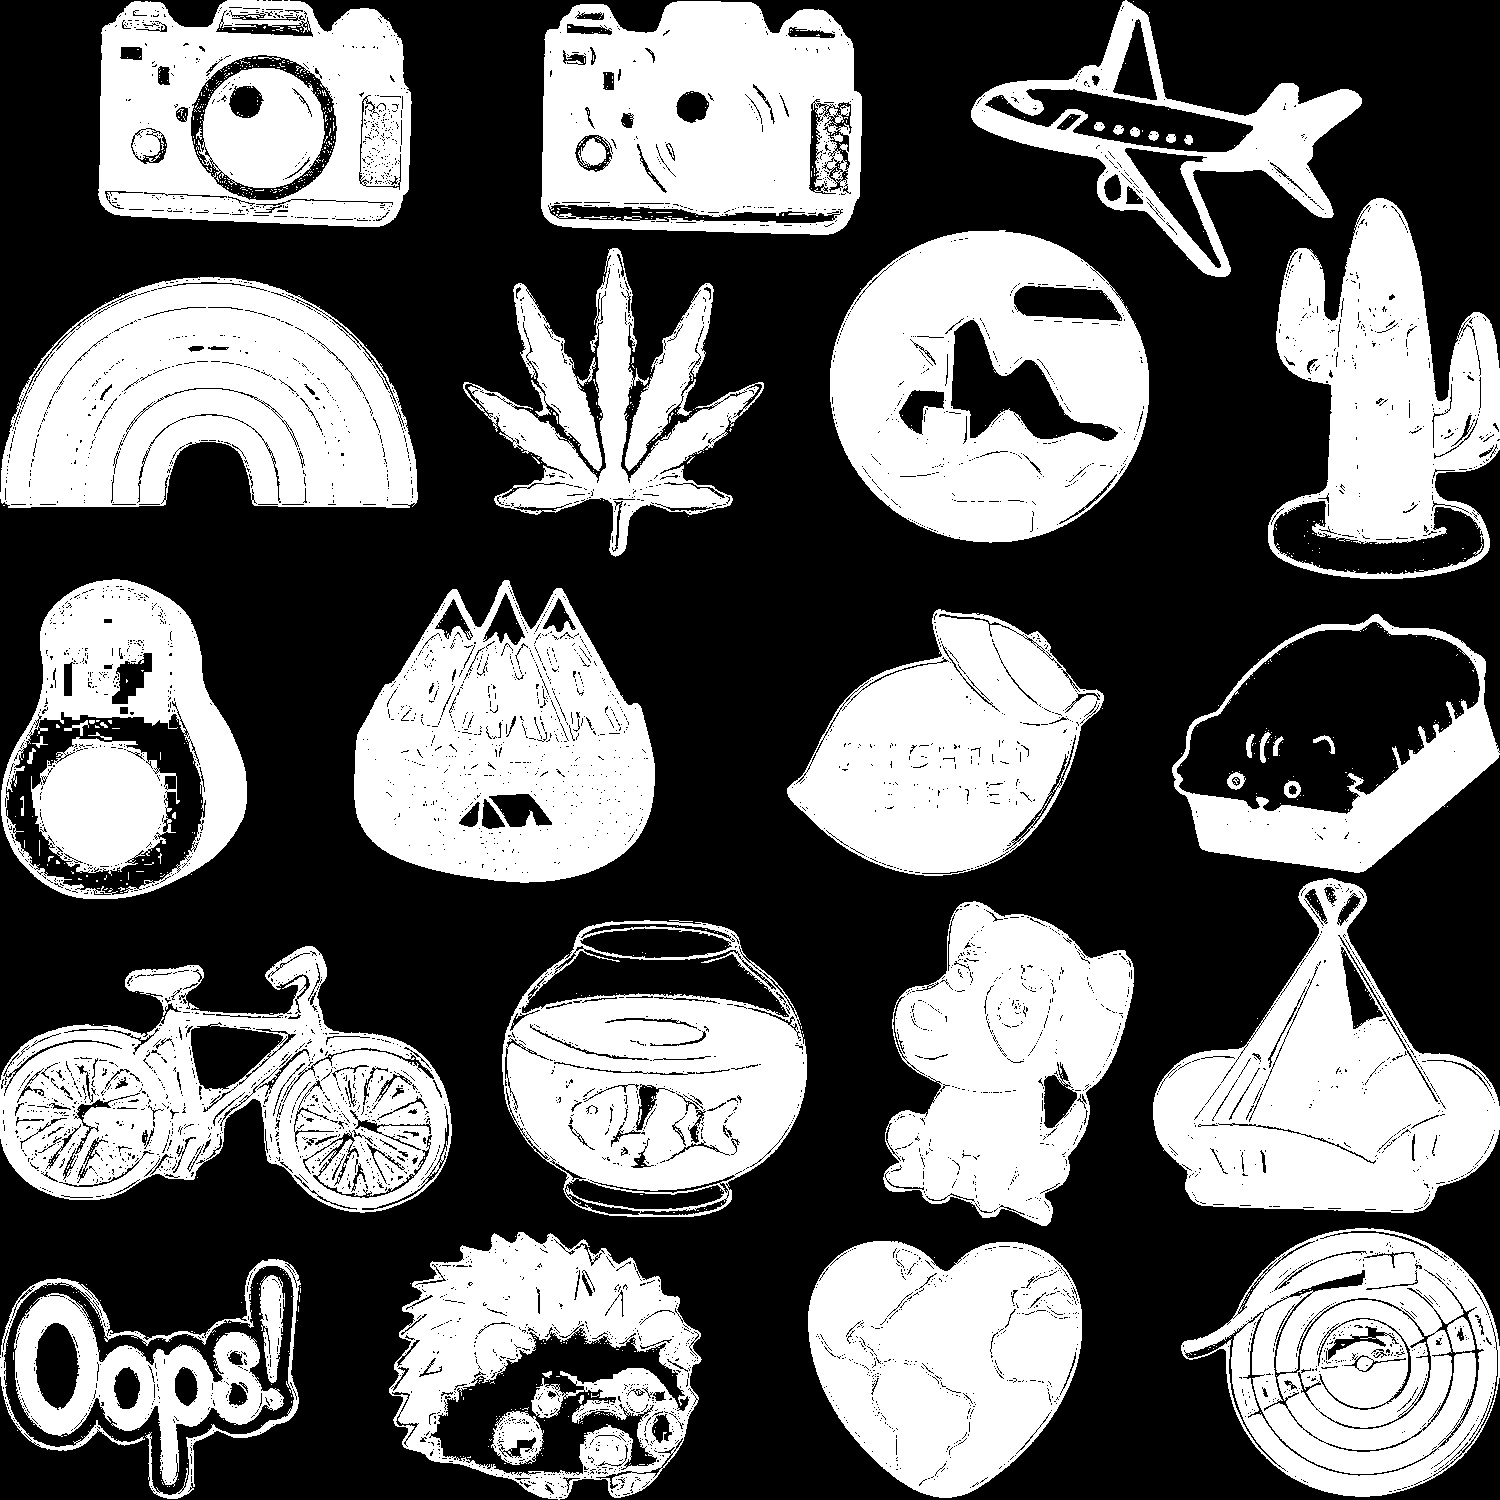

In [5]:
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2.imwrite("jpg/threshold.jpg", thresh)
Image("jpg/threshold.jpg")

zaznaczanie kontur

In [9]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image3.copy()

for c in cnts:
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)

cv2.imwrite("jpg/kontury.jpg", output)
Image("jpg/kontury.jpg")

wygładzanie obrazu za pomocą erode

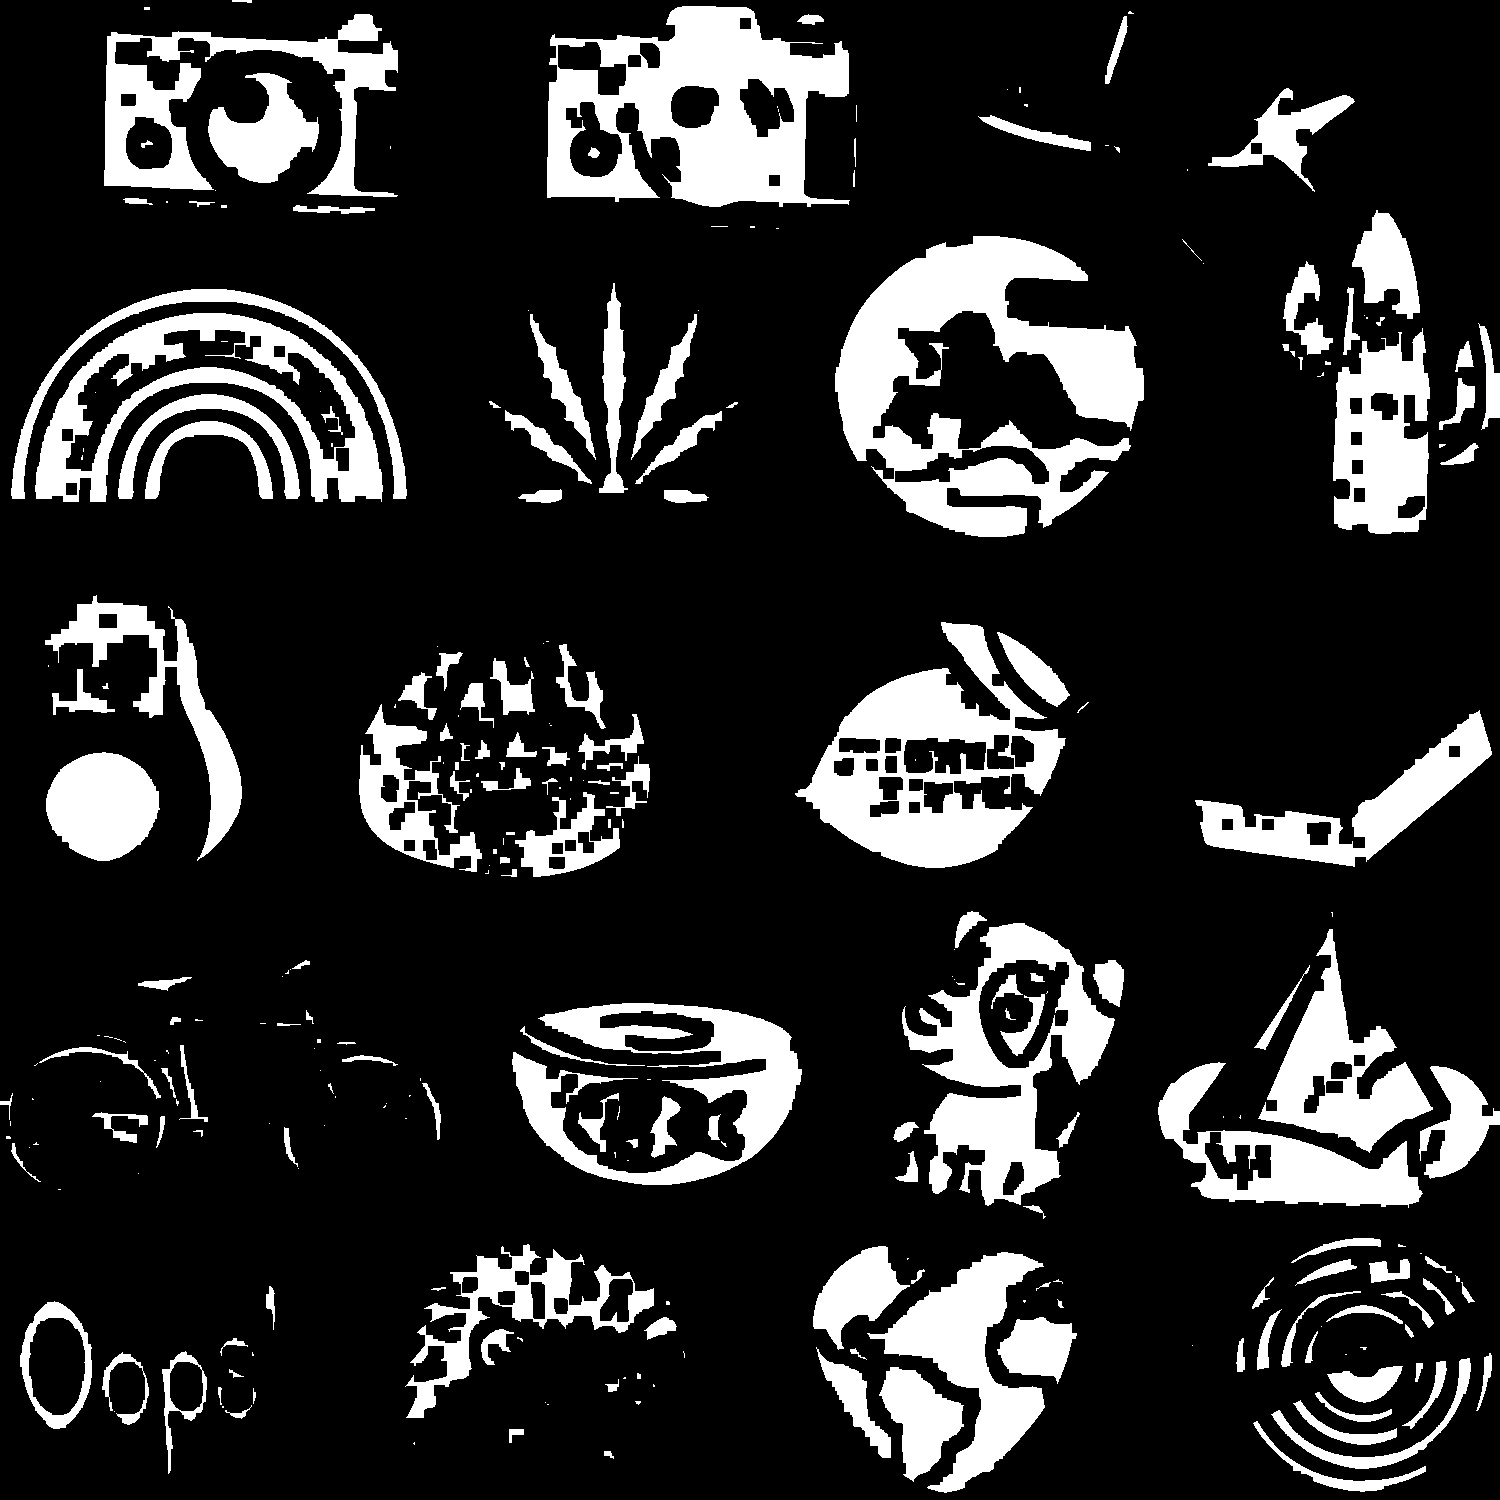

In [11]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
cv2.imwrite("jpg/eroded.jpg", mask)
Image("jpg/eroded.jpg")

zwiększenie regionu obiektów

In [12]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2.imwrite("jpg/dilated.jpg", mask)
Image("jpg/dilated.jpg")

nałożenie maski na oryginalny obraz

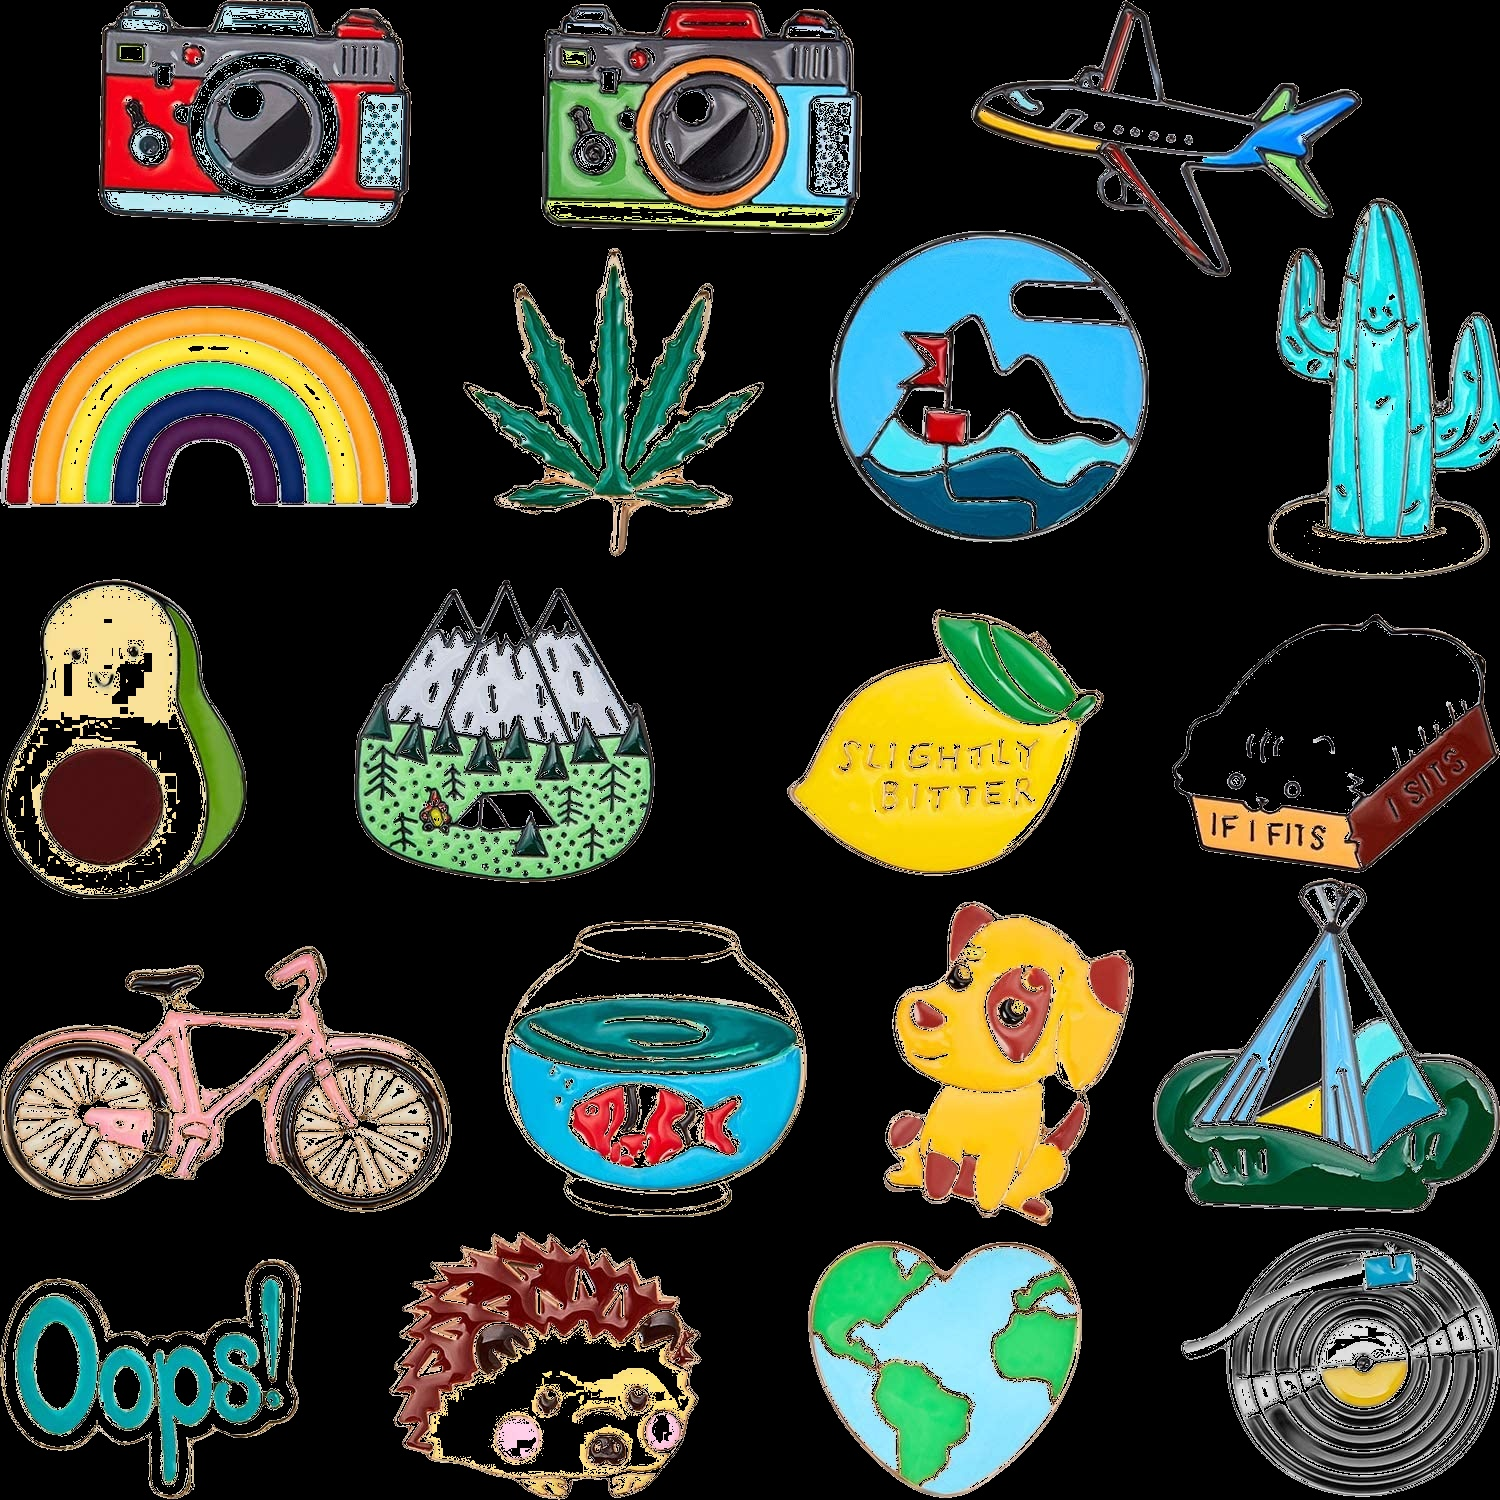

In [13]:
mask = thresh.copy()
output = cv2.bitwise_and(image3, image3, mask=mask)
cv2.imwrite("jpg/final.jpg", output)
Image("jpg/final.jpg")

